<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #e769b7; font-size: 50px; font-weight: bold; font-style: italic;">🧠 VecTorium</h1>


<hr style="border: 2px solid #e769b7;">
<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">
    <p style="font-size: 20px; font-family: 'Verdana'; color: #3A405A; text-align: center; font-weight: bold;">Here’s our Brain Tumor Classification project for the Introduction toOur  AI and Machine Learning course! We present VecTorium, a custom deep learning model, at the core of this project. Through this notebook, we dive into the process of training VecTorium and enhancing its performance with methods like early stopping and dynamic learning rate tuning. Follow along as we demonstrate our approach to solving the brain tumor classification challenge effectively.🧠🧠</p>
</di>


<hr style="border: 2px solid #e769b7;">
<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #e769b7; font-size: 36px; font-weight: bold; font-style: italic;">Importing Packages</h1>


In [2]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications import ResNet50, EfficientNetB3, VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


<hr style="border: 2px solid #e769b7;">
<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #e769b7; font-size: 36px; font-weight: bold; font-style: italic;">Loading and Preprocess of The Data</h1>


In [3]:

image_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Load data
X_data, Y_data = [], []
for label in labels:
    for dataset_type in ['Training', 'Testing']:
        folder_path = os.path.join(f'/kaggle/input/brain-tumor-mri-dataset/{dataset_type}', label)
        for img_file in os.listdir(folder_path):
            img = cv2.imread(os.path.join(folder_path, img_file))
            img = cv2.resize(img, (image_size, image_size))
            X_data.append(img)
            Y_data.append(label)

X_data = np.array(X_data)
Y_data = np.array(Y_data)


X_data, Y_data = shuffle(X_data, Y_data, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.1, random_state=101)


y_train = tf.keras.utils.to_categorical([labels.index(label) for label in y_train])
y_test = tf.keras.utils.to_categorical([labels.index(label) for label in y_test])


datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)
train_gen = datagen.flow(X_train, y_train, batch_size=32)


<hr style="border: 2px solid #e769b7;">
<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #e769b7; font-size: 36px; font-weight: bold; font-style: italic;">Building Our Custom Ensemble Model For This Problem</h1>


In [27]:
def vectorizing_model():

    # Here we are taking each model and Freeze the base model layers
    
    # EfficientNetB3 Model
    efficientnet = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    efficientnet.trainable = False  

    # VGG16 Model
    vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    vgg16.trainable = False  

    # ResNet50 Model
    resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))
    resnet.trainable = False  

    # Here We are concatenating the layers 
    x1 = GlobalAveragePooling2D()(efficientnet.output)
    x2 = GlobalAveragePooling2D()(vgg16.output)
    x3 = GlobalAveragePooling2D()(resnet.output)

    concatenated = tf.keras.layers.concatenate([x1, x2, x3])
    x = Dense(512, activation='relu')(concatenated)
    x = Dropout(0.5)(x)
    output = Dense(len(labels), activation='softmax')(x)

    model = Model(inputs=[efficientnet.input, vgg16.input, resnet.input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

VecTorium = vectorizing_model()


<hr style="border: 2px solid #e769b7;">
<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #e769b7; font-size: 36px; font-weight: bold; font-style: italic;">VecTorium: Our Own Hybrid Deep Learning Ensemble Approach for these kinds of problems</h1>

<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">
    <p style="font-size: 20px; font-family: 'Verdana'; color: #3A405A; text-align: center;">
        This code block defines a hybrid ensemble model that leverages the power of three popular pre-trained convolutional neural networks (CNNs): EfficientNetB3, VGG16, and ResNet50. These models are combined into a single architecture and optimized together to create a robust classifier. The outputs of the base models are processed by <strong>GlobalAveragePooling2D</strong> layers, which reduce each model's output to a fixed-length feature vector.
    </p>
</div>

<hr style="border: 2px solid #e769b7;">

<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #e769b7; font-size: 28px; font-weight: bold;">How It Works</h3>

<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">
    <ul style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.6;">
        <li><strong>Base Models:</strong>
            <ul>
                <li>EfficientNetB3, VGG16, and ResNet50 are used as feature extractors by freezing their weights, which allows them to retain knowledge from the ImageNet dataset.</li>
                <li>These models are not retrained, which reduces computational overhead and helps prevent overfitting.</li>
            </ul>
        </li>
        <li><strong>Feature Combination:</strong>
            <ul>
                <li>The outputs of the base models are processed by <strong>GlobalAveragePooling2D</strong> layers, which reduce each model's output to a fixed-length feature vector.</li>
                <li>These feature vectors are concatenated, effectively combining information from all three models into one comprehensive feature representation.</li>
            </ul>
        </li>
        <li><strong>Final Classifier:</strong>
            <ul>
                <li>A fully connected layer (<strong>Dense(512)</strong>) followed by a <strong>Dropout</strong> layer is used to learn the complex patterns from the combined features.</li>
                <li>The final output layer is a softmax classifier that assigns probabilities to each class, making the model suitable for multi-class classification tasks.</li>
            </ul>
        </li>
    </ul>
</div>

<hr style="border: 2px solid #e769b7;">

<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #e769b7; font-size: 28px; font-weight: bold;">Comparison with Traditional Ensemble Models</h3>

<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">
    <table style="width: 100%; font-family: 'Verdana'; border-collapse: collapse;">
        <thead>
            <tr>
                <th style="padding: 10px; background-color: #e769b7; color: white; text-align: center;">Aspect</th>
                <th style="padding: 10px; background-color: #e769b7; color: white; text-align: center;">Traditional Ensemble Approach</th>
                <th style="padding: 10px; background-color: #e769b7; color: white; text-align: center;">This Code's Approach</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="padding: 10px; text-align: center;">Model Independence</td>
                <td style="padding: 10px; text-align: center;">Models are trained separately and predictions are combined (voting, averaging).</td>
                <td style="padding: 10px; text-align: center;">Models are integrated into a single architecture, with features combined before classification.</td>
            </tr>
            <tr>
                <td style="padding: 10px; text-align: center;">Feature Combination</td>
                <td style="padding: 10px; text-align: center;">Predictions are aggregated after independent training.</td>
                <td style="padding: 10px; text-align: center;">Features are concatenated directly within the model, allowing end-to-end optimization.</td>
            </tr>
            <tr>
                <td style="padding: 10px; text-align: center;">Training Process</td>
                <td style="padding: 10px; text-align: center;">Models are trained independently; ensemble logic is applied afterward.</td>
                <td style="padding: 10px; text-align: center;">End-to-end training of the combined model, with only the dense layers being trained.</td>
            </tr>
            <tr>
                <td style="padding: 10px; text-align: center;">Input Handling</td>
                <td style="padding: 10px; text-align: center;">Each model processes the input separately and aggregates predictions.</td>
                <td style="padding: 10px; text-align: center;">Same input is passed to all models simultaneously, and their feature representations are merged.</td>
            </tr>
        </tbody>
    </table>
</div>

<hr style="border: 2px solid #e769b7;">

<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #e769b7; font-size: 28px; font-weight: bold;">Advantages of This Approach</h3>

<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">
    <ul style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; line-height: 1.6;">
        <li><strong>End-to-End Optimization:</strong> The model is trained as a unified system, improving the integration of features from different architectures.</li>
        <li><strong>Feature Enrichment:</strong> The combination of features from different models helps capture diverse patterns, leading to potentially better performance.</li>
        <li><strong>Efficiency:</strong> Pre-trained base models are frozen, reducing the training time and computational cost compared to fully retrained models.</li>
    </ul>
</div>

<hr style="border: 2px solid #e769b7;">

<h3 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #e769b7; font-size: 28px; font-weight: bold;">Conclusion</h3>

<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">
    <p style="font-size: 20px; font-family: 'Verdana'; color: #3A405A; text-align: center;">
        Unlike traditional ensemble methods that combine model predictions, this approach concatenates feature representations from multiple models and trains a shared classifier on these combined features. It provides a more integrated andefficient solution for leveraging the strengths of multiple architectures.
    </p>
</div>
ng the strengths of multiple architectures.

<hr style="border: 2px solid #e769b7;">
<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #e769b7; font-size: 36px; font-weight: bold; font-style: italic;">Training the Model with Dynamic Epoch Monitoring</h1>


In [10]:
# Callback to dynamically save and analyze training history
class EpochsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}: Training Accuracy={logs['accuracy']:.4f}, Validation Accuracy={logs['val_accuracy']:.4f}")

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    EpochsCallback()
]

history = VecTorium.fit(
    [X_train, X_train, X_train], y_train,
    epochs=30,  # A higher number was used to allow the model to train for longer , it will be halted by earlystopper
    validation_data=([X_test, X_test, X_test], y_test),
    callbacks=callbacks
)


Epoch 1/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.6494 - loss: 1.3659Epoch 1: Training Accuracy=0.7578, Validation Accuracy=0.9018
198/198 ━━━━━━━━━━━━━━━━━━━━ 138s 419ms/step - accuracy: 0.6499 - loss: 1.3632 - val_accuracy: 0.9018 - val_loss: 0.3016 - learning_rate: 1.0000e-04
Epoch 2/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.8810 - loss: 0.3369Epoch 2: Training Accuracy=0.8840, Validation Accuracy=0.9246
198/198 ━━━━━━━━━━━━━━━━━━━━ 35s 175ms/step - accuracy: 0.8810 - loss: 0.3368 - val_accuracy: 0.9246 - val_loss: 0.2109 - learning_rate: 1.0000e-04
Epoch 3/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.9087 - loss: 0.2537Epoch 3: Training Accuracy=0.9161, Validation Accuracy=0.9289
198/198 ━━━━━━━━━━━━━━━━━━━━ 34s 171ms/step - accuracy: 0.9087 - loss: 0.2536 - val_accuracy: 0.9289 - val_loss: 0.2014 - learning_rate: 1.0000e-04
Epoch 4/30
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.9317 - loss: 0.1928Epoch 4: Training Acc

<hr style="border: 2px solid #e769b7;">
<body style="background-color: white; font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif;">
  <h1 style="text-align: center; color: #e769b7; font-size: 36px; font-weight: bold; font-style: italic;">Training the Model with Callbacks: Epoch Analysis and Adjustments</h1>

  <p style="font-size: 18px; line-height: 1.6;">
    In this section, we are training a model using custom callbacks and monitoring metrics during each epoch to optimize performance.
  </p>

  <h2 style="font-size: 24px; color: #e769b7;">Model Training Overview</h2>
  <ul style="font-size: 18px; line-height: 1.6;">
    <li><strong>Training Data</strong>: <code>X_train</code> (input data) and <code>y_train</code> (target data).</li>
    <li><strong>Validation Data</strong>: <code>X_test</code> and <code>y_test</code> to evaluate model performance during training.</li>
    <li><strong>Epochs</strong>: The model is set to train for <strong>30 epochs</strong> (iterations), although early stopping will halt the training process if no improvement is observed.</li>
  </ul>

  <h2 style="font-size: 24px; color: #e769b7;">Custom Callbacks</h2>
  <p style="font-size: 18px; line-height: 1.6;">
    We use several callbacks to enhance the training process:
  </p>

  <ol style="font-size: 18px; line-height: 1.6;">
    <li><strong>ReduceLROnPlateau</strong>:
      <ul>
        <li>This callback monitors the validation loss (<code>val_loss</code>). If the validation loss stops improving for <strong>3 epochs</strong> (patience=3), the learning rate is reduced by a factor of <strong>0.2</strong> to help the model converge better.</li>
        <li>The callback's verbosity is set to <strong>1</strong>, so you will see the learning rate reduction in the logs when triggered.</li>
      </ul>
    </li>
    <li><strong>EarlyStopping</strong>:
      <ul>
        <li>This stops the training early if the validation loss does not improve for <strong>5 epochs</strong> (patience=5).</li>
        <li>The best weights from the epoch with the lowest validation loss are restored, ensuring the model doesn't overfit.</li>
      </ul>
    </li>
    <li><strong>EpochsCallback</strong>:
      <ul>
        <li>This custom callback prints the training and validation accuracy at the end of each epoch for more detailed monitoring of model performance.</li>
        <li>Example output for the first epoch:
            Epoch 1: Training Accuracy=0.7578, Validation Accuracy=0.9018
        </li>
      </ul>
    </li>
  </ol>

  <h2 style="font-size: 24px; color: #e769b7;">Training Process and Adjustments</h2>
  <p style="font-size: 18px; line-height: 1.6;">
    The following highlights from the training logs demonstrate the adjustments and progress made throughout the epochs:
  </p>

  <ul style="font-size: 18px; line-height: 1.6;">
    <li><strong>Epoch 1</strong>: 
      <ul>
        <li>The training accuracy starts at <strong>75.78%</strong>, and the validation accuracy is <strong>90.18%</strong>.</li>
        <li>At this point, the model's learning rate is set to <strong>0.0001</strong>.</li>
      </ul>
    </li>
    <li><strong>Epoch 2 to 12</strong>: 
      <ul>
        <li>Gradual improvements in training accuracy and validation accuracy can be observed, with the model learning faster in the initial epochs.</li>
        <li>At Epoch 12, the training accuracy reaches <strong>98.61%</strong>, and the validation accuracy is <strong>96.16%</strong>.</li>
      </ul>
    </li>
    <li><strong>Epoch 14</strong>:
      <ul>
        <li>After seeing little improvement, <strong>ReduceLROnPlateau</strong> triggers and reduces the learning rate from <strong>0.0001</strong> to <strong>0.00002</strong>.</li>
        <li>Despite the change in learning rate, the model continues to improve slightly, with <strong>98.80%</strong> training accuracy and <strong>96.73%</strong> validation accuracy.</li>
      </ul>
    </li>
    <li><strong>Epoch 16</strong>:
      <ul>
        <li>Early stopping is triggered after the validation performance plateaus. The training halts, and the model weights from the best epoch (Epoch 11) are restored.</li>
        <li>Final training and validation accuracies at this point are <strong>99.49%</strong> and <strong>96.73%</strong>, respectively.</li>
      </ul>
    </li>
  </ul>

  <h2 style="font-size: 24px; color: #e769b7;">Summary of Key Events:</h2>
  <ul style="font-size: 18px; line-height: 1.6;">
    <li><strong>Epoch 1 to 12</strong>: Significant improvements in accuracy are observed as the model learns.</li>
    <li><strong>Epoch 14</strong>: Learning rate reduction is triggered to facilitate better convergence.</li>
    <li><strong>Epoch 16</strong>: Early stopping halts training, and the model returns to the best epoch.</li>
  </ul>

  <p style="font-size: 18px; line-height: 1.6;">
    This setup ensures that the model trains efficiently, adapts to changes in learning rate, and avoids overfitting with early stopping.
  </p>
</body>
nges in learning rate, and avoids overfitting with early stopping.
  </p>
</body>
</p>


<hr style="border: 2px solid #e769b7;">
<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #e769b7; font-size: 36px; font-weight: bold; font-style: italic;">Analysing Training and Validation Curves</h1>

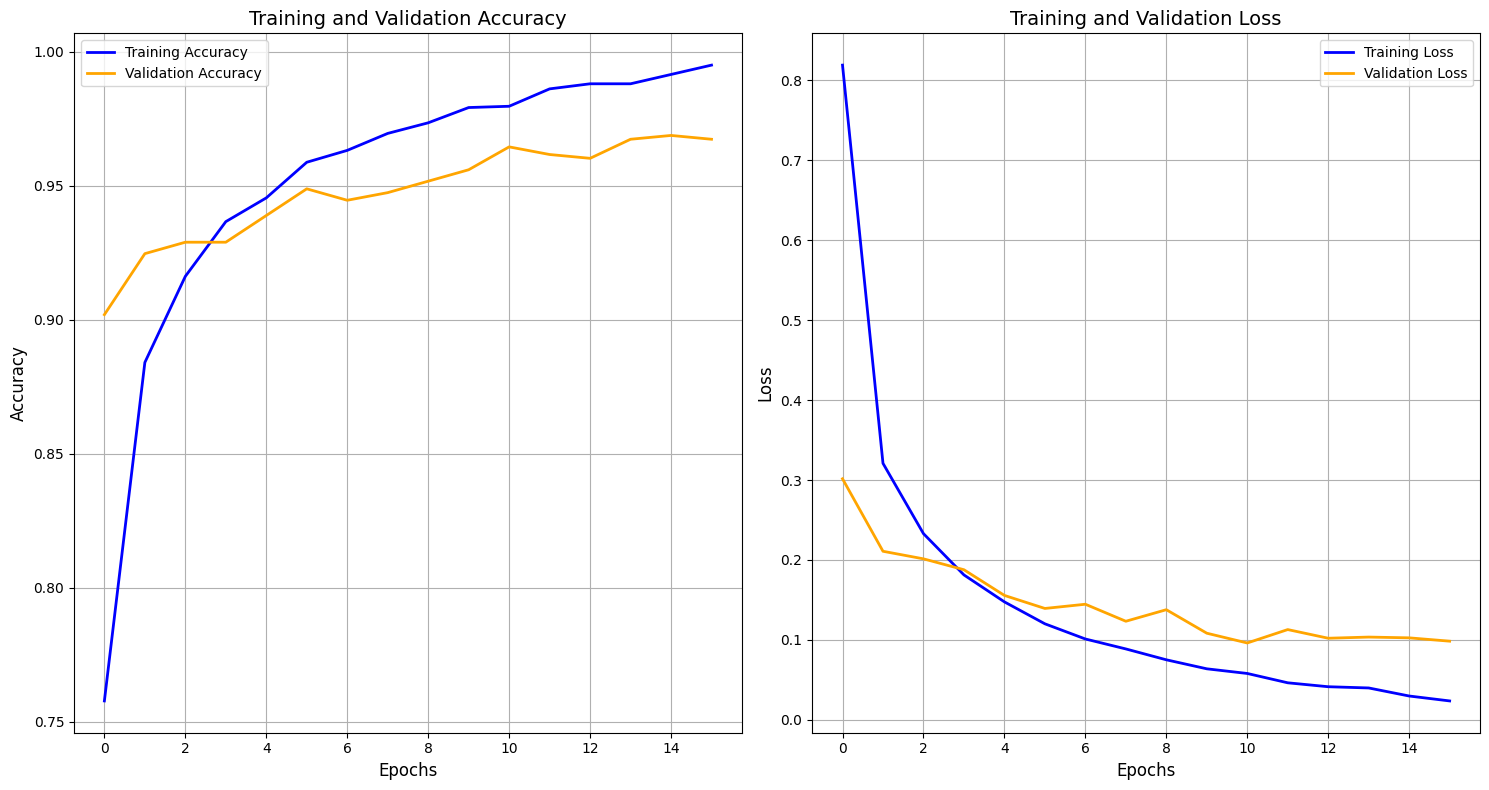

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 149ms/step


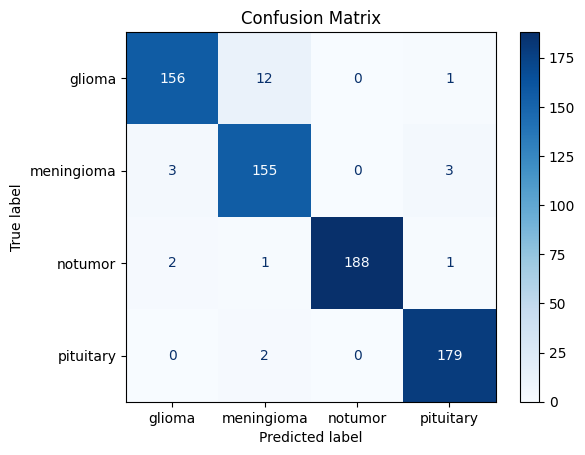

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

plt.figure(figsize=(15, 8))

# Ploting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linewidth=2)
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Ploting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Confusion Matrix
y_pred = VecTorium.predict([X_test, X_test, X_test])
y_pred_classes = np.argmax(y_pred, axis=1)  # Converting to class indices
y_true_classes = np.argmax(y_test, axis=1)  # True class indices

cm = confusion_matrix(y_true_classes, y_pred_classes)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


<hr style="border: 2px solid #e769b7;">
<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #e769b7; font-size: 36px; font-weight: bold; font-style: italic;">Evaluating The Model</h1>

In [14]:
test_loss, test_accuracy = VecTorium.evaluate([X_test, X_test, X_test], y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 151ms/step - accuracy: 0.9695 - loss: 0.0848
Test Accuracy: 96.44%
Test Loss: 0.0962


<hr style="border: 2px solid #e769b7;">
<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #e769b7; font-size: 36px; font-weight: bold; font-style: italic;">Testing The Model</h1>

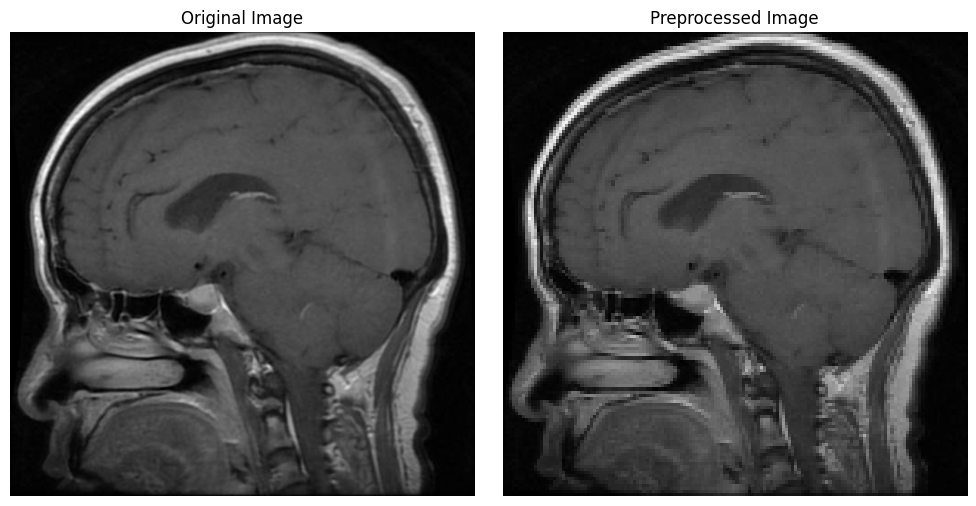

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step

Prediction Results
Predicted Label: meningioma

Prediction Probabilities:

| Label                | Probability (%) |
|----------------------|------------------|
| glioma               |            0.32 |
| meningioma           |           98.91 |
| notumor              |            0.57 |
| pituitary            |            0.20 |


In [29]:
def predict_and_display(img_path, model):
    # Loading and preprocessing the image
    img = cv2.imread(img_path)
    original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for display
    img = cv2.resize(img, (image_size, image_size))
    img_array = np.expand_dims(img, axis=0)  # Add batch dimension

    # Showing the original input image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')

    # Showing the preprocessed image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Preprocessed Image')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Predicting the label
    prediction = model.predict([img_array, img_array, img_array])
    predicted_label = labels[np.argmax(prediction)]

    #prediction probabilities
    prediction_percentages = (prediction[0] * 100).round(2)  # Convert to percentages and round off
    label_probabilities = {labels[i]: prediction_percentages[i] for i in range(len(labels))}

    # Displaying the predicted label
    print("\nPrediction Results")
    print(f"Predicted Label: {predicted_label}")
    print("\nPrediction Probabilities:\n")

    # Displaying probabilities in a tabular format
    print(f"| {'Label':<20} | {'Probability (%)':>15} |")
    print(f"|{'-' * 22}|{'-' * 18}|")
    for label, prob in label_probabilities.items():
        print(f"| {label:<20} | {prob:>15.2f} |")

# Example of testing on a random image
img_path = '/kaggle/input/brain-tumor-mri-dataset/Testing/pituitary/Te-piTr_0003.jpg'
predict_and_display(img_path, VecTorium)
from IPython.display import FileLink


<hr style="border: 2px solid #e769b7;">
<h1 style="font-family: 'Lucida Sans', 'Lucida Sans Regular', 'Lucida Grande', 'Lucida Sans Unicode', Geneva, Verdana, sans-serif; text-align: center; color: #e769b7; font-size: 36px; font-weight: bold; font-style: italic;">Saving The Model To H5 Model To Be Used For My Flask Backend Server</h1>

In [16]:
from IPython.display import FileLink
ensemble_model.save('/kaggle/working/VecTorium.h5')
FileLink('/kaggle/working/VecTorium.h5')

/kaggle/working/VecTorium.h5